In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2022-09-10 23:39:22.805916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-10 23:39:22.905594: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-10 23:39:22.909653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-10 23:39:22.909669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
#Importing the dataset
dataset = pd.read_csv("data.csv")

In [3]:
X = dataset.iloc[:, [0,1]].values

In [4]:
Y = dataset.iloc[:, 2].values

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
model = Sequential()

2022-09-10 23:39:24.730355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-10 23:39:24.730390: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-10 23:39:24.730405: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (madhavm0706-Inspiron-15-5518): /proc/driver/nvidia/version does not exist
2022-09-10 23:39:24.730638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.add(Dense(units= 20, activation= 'relu', input_dim = 2))

In [9]:
model.add(Dense(units= 10, activation = 'relu'))

In [10]:
model.add(Dense(units= 1))

In [11]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.7)
print(lr_schedule)
opt = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss = 'mean_squared_error')

In [12]:
model.fit(X_train, y_train)

4/4 [==============================] - 0s 1ms/step - loss: 1861.7853


In [13]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


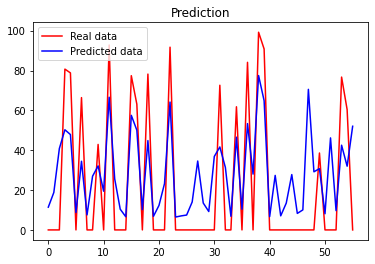

In [14]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [15]:
import joblib
joblib.dump(model,"mlmodule.pk1")


INFO:tensorflow:Assets written to: ram://fc4923a9-2724-4a13-bba7-d6b795b4b9c2/assets


['mlmodule.pk1']

In [16]:
module  = joblib.load("mlmodule.pk1")


In [21]:
module.predict([[50.2,88.4]])[0][0]


1/1 [==============================] - 0s 33ms/step


1488.8231